## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', category=UserWarning) 


In [2]:
df = pd.read_csv('WineData.csv')
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
df.shape

(178, 13)

In [9]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [11]:
scaler = StandardScaler()
dc = scaler.fit_transform(df)

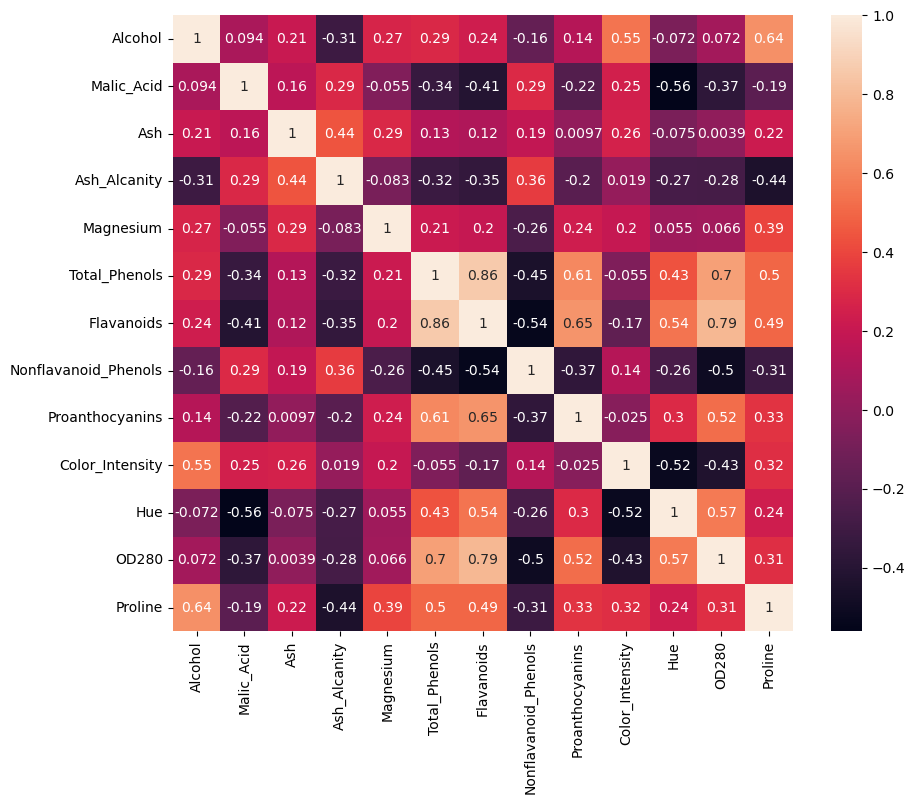

In [24]:
import seaborn as sns
corr_mat = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True)
plt.show()

### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



In [32]:
inertia = []
k_range = range(1,20)
for k in k_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dc)
    inertia.append(kmeans.inertia_)

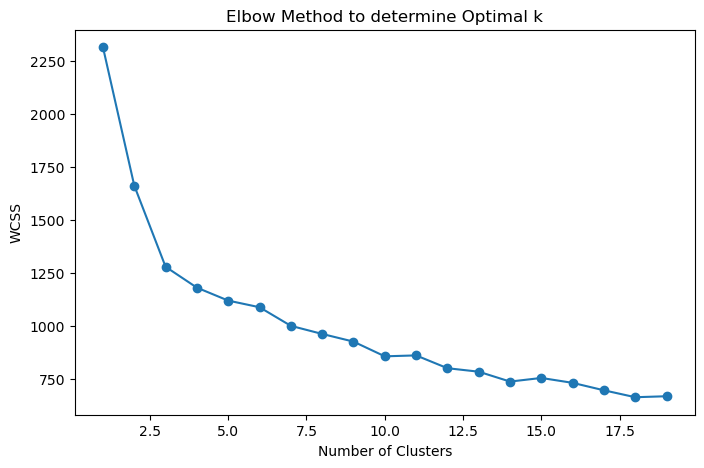

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to determine Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



In [34]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(dc)

KMeans(n_clusters=5)

In [37]:
df['cluster'] = kmeans.labels_
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,4
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,4
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,4
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,4


### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [41]:
df.groupby('cluster').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
cluster,,,,,,,,,,,,,
0,12.834000,3.337333,2.498000,21.566667,95.066667,1.752000,0.827333,0.573333,1.006000,5.042000,0.850000,1.994000,599.133333
1,12.454706,1.557353,2.053529,18.258824,94.617647,1.951176,1.702941,0.365294,1.379412,3.207647,1.077529,2.546176,539.794118
2,12.183514,2.288378,2.427838,21.545946,93.675676,2.560811,2.454865,0.338649,1.821351,3.056216,1.023784,2.998649,516.297297
3,13.756316,1.938421,2.445965,17.150877,107.859649,2.864737,2.995789,0.286316,1.936316,5.543509,1.069649,3.158421,1130.684211
4,13.235429,3.362857,2.420000,21.457143,99.914286,1.653429,0.837429,0.415429,1.240857,8.188286,0.634000,1.640571,630.142857


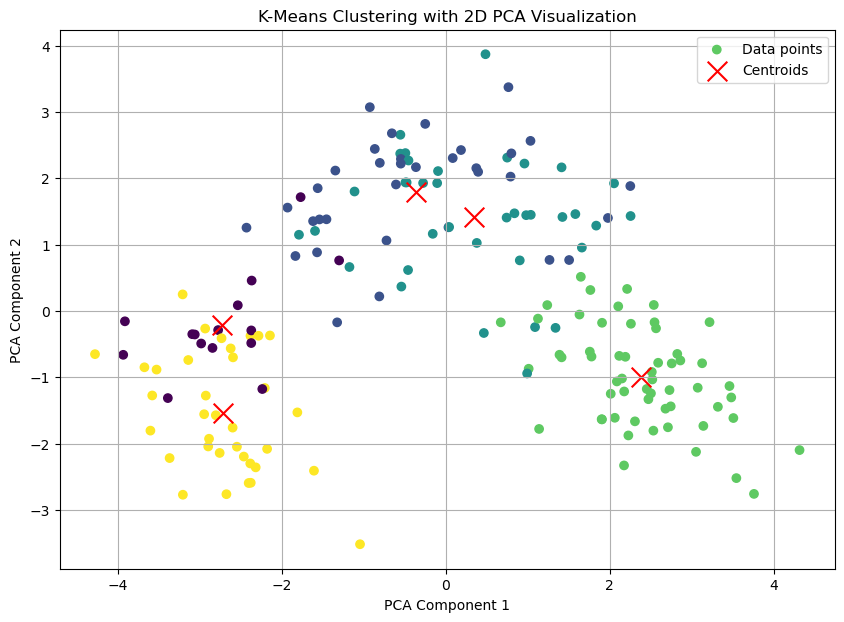

In [57]:
from sklearn.decomposition import PCA
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
pca = PCA(2)
data_2d = pca.fit_transform(dc)
plt.figure(figsize=(10, 7))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', marker='o', label='Data points')
centroids_2d = pca.transform(centroids)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering with 2D PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

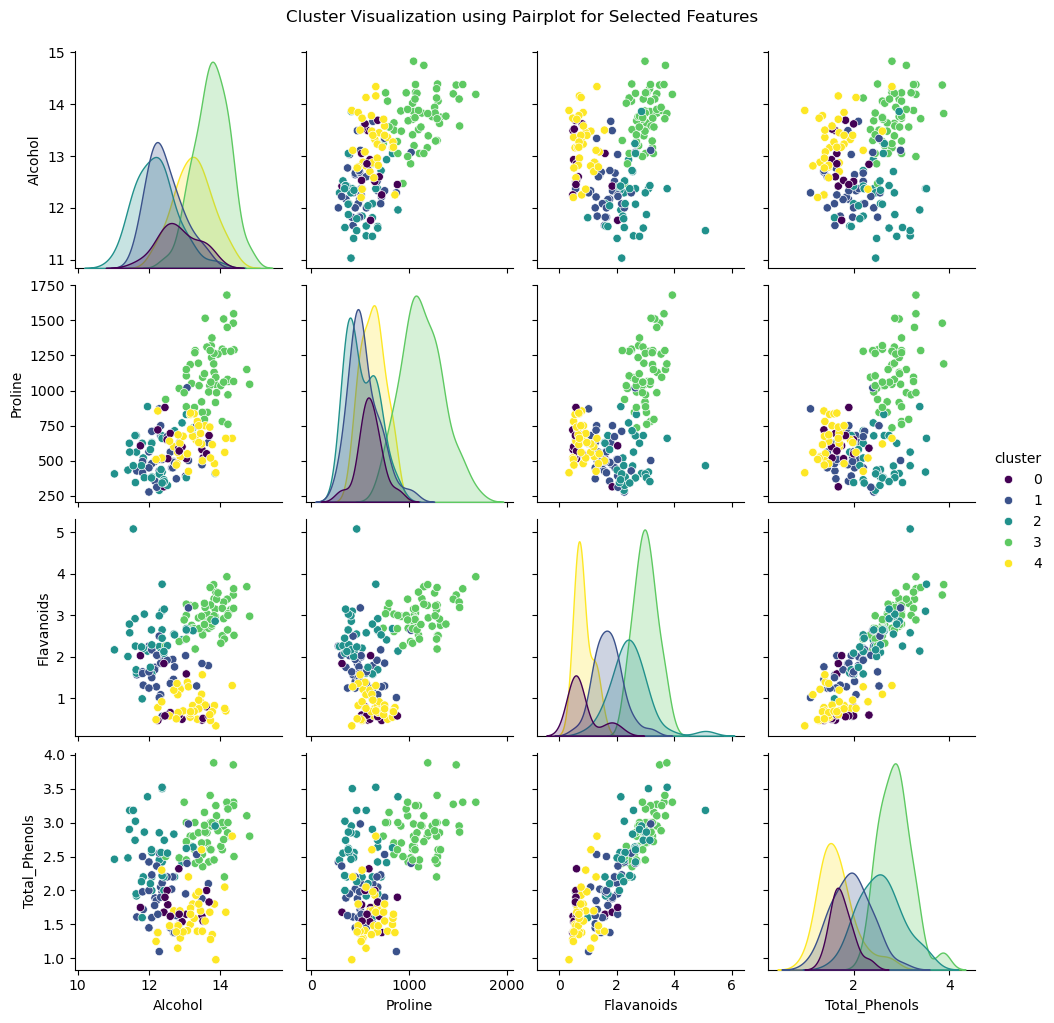

In [51]:
feature = ['Alcohol', 'Proline', 'Flavanoids', 'Total_Phenols']
p = sns.pairplot(df, vars=feature, hue='cluster', palette='viridis')
p._legend.set_title('cluster')
plt.suptitle('Cluster Visualization using Pairplot for Selected Features', y=1.02)
plt.show()

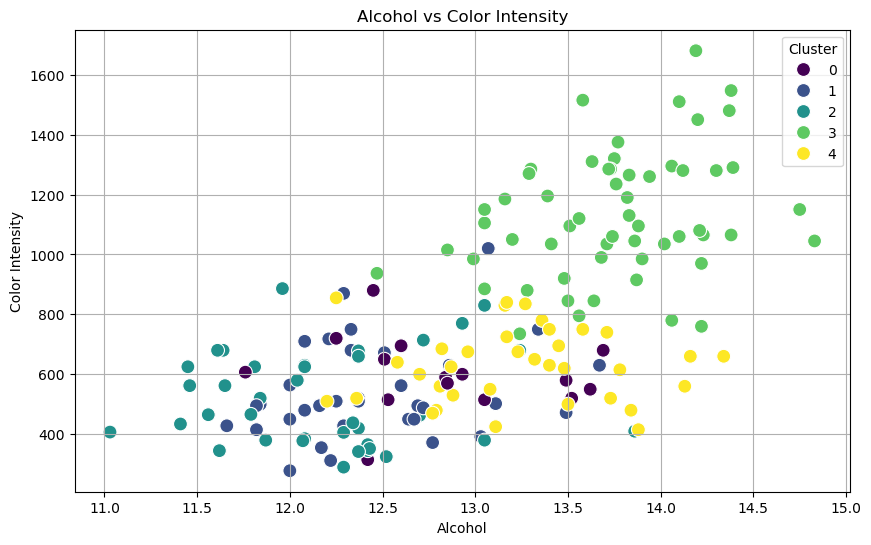

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Alcohol', y='Proline', hue='cluster', palette='viridis', s=100)
plt.title('Alcohol vs Color Intensity')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


# From pairplot
### Cluster 4 has wide alcohol, moderate prolins and flavanoids and moderately to hight total phenols
### Cluster 3 has the highst level alchohol (13-15), high proline , higher flavanoids and total phenol
### Cluster 2 has moderate to high alcohol ,flavanoids,total phenols and moderate proline
### Cluster 1 has low to moderate alchohol,proline, moderate total phenols and less flavanoids
### Cluster 0 has lowest alchohol,proline,flaanoids and total phenols


# Catagories of each cluster
1. Cluster 4 = Flavorful
2. Cluster 3 = Rich
3. Cluster 2 = Elegent
4. Cluster 1 = Mild
5. Cluster 0 = Light

# Best of Luck